<font size=8>Synthetic WOD explore and prep - TSM</font>

xxxx



In [1]:
import os
import dask
import numpy as np
import pandas as pd
import dask.array as dask
import dask.bag as db
from matplotlib import pyplot as plt
import xarray as xr
import xesmf
import pandas as pd
import geopandas

In [2]:
xr.set_options(keep_attrs=True) ## This ensures that performing simple operations with xarray (eg converting temperature to Celsius) preserves attributes

## small local cluster

In [3]:
from dask.distributed import Client
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 4
Total threads: 4,Total memory: 18.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:46333,Workers: 4
Dashboard: /proxy/8787/status,Total threads: 4
Started: Just now,Total memory: 18.00 GiB
Comm: tcp://127.0.0.1:34031,Total threads: 1
Dashboard: /proxy/41235/status,Memory: 4.50 GiB
Nanny: tcp://127.0.0.1:36785,


## Big cluster

## synthetic WoD from CChapman

In [4]:
path = '/g/data4/ul08/CARS_v2/Synthetic_WOD/2018'

In [ ]:
ctd = xr.open_dataset(path+'/synthetic_wod_2018_ctd.nc')

In [ ]:
ctd

In [ ]:
ctd_DF = ctd.to_dataframe()
ctd_DF

In [ ]:
ctd_DF = ctd_DF.reset_index(level=0).reset_index(level=0)

In [ ]:
ctd_DF

In [ ]:
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

In [ ]:
ctd_DF = ctd_DF[['time','longitude','latitude','depth','temp']]
ctd_DF

In [ ]:
ctd_DF.plot(x='longitude',y='latitude',kind='scatter')

# Can I build one big DF from all the synthetic WOD nc's?

In [ ]:
path = '/g/data4/ul08/CARS_v2/Synthetic_WOD/2018/'
str_part1 = 'synthetic_wod_2018_'
list_of_data_types = ['ctd','xbt','pfl','mrb','gld','osd']
list_of_file_paths = []
for type_ in list_of_data_types:
    list_of_file_paths.append(path+str_part1+type_+'.nc')
    
list_of_file_paths

In [ ]:
concat_list = []
for file in list_of_file_paths:
    A = xr.open_dataset(file).to_dataframe().reset_index(level=0).reset_index(level=0)
    A = A.drop(columns='casts')
    id_string = file[60:63]
    total_rows = len(A)
    id_ = [id_string]*total_rows
    A["identifier"] = id_
    A = A[['longitude','latitude','temp','depth','time','identifier']]
    list_obj = A.to_dict('list')
    concat_list.append(list_obj)

In [ ]:
DF = pd.DataFrame(concat_list)

In [ ]:
DF

# smaller problem 

In [ ]:
path = '/g/data4/ul08/CARS_v2/Synthetic_WOD/2018/'
str_part1 = 'synthetic_wod_2018_'
list_of_data_types = ['ctd']
list_of_file_paths = []
for type_ in list_of_data_types:
    list_of_file_paths.append(path+str_part1+type_+'.nc')
    
list_of_file_paths

In [ ]:
DF = pd.DataFrame(columns=['longitude','latitude','temp','depth','time','identifier'])
for file in list_of_file_paths:
    A = xr.open_dataset(file).to_dataframe().reset_index(level=0).reset_index(level=0)
    A = A.drop(columns='casts')
    id_string = file[60:63]
    total_rows = len(A)
    id_ = [id_string]*total_rows
    A["identifier"] = id_
    A = A[['longitude','latitude','temp','depth','time','identifier']]
    DF = pd.concat([DF,A], axis=0)

In [ ]:
DF

# full size problem

In [38]:
path = '/g/data4/ul08/CARS_v2/Synthetic_WOD/2018/'
str_part1 = 'synthetic_wod_2018_'
list_of_data_types = ['ctd','xbt','pfl','mrb','gld','osd']
list_of_file_paths = []
for type_ in list_of_data_types:
    list_of_file_paths.append(path+str_part1+type_+'.nc')
    
list_of_file_paths

['/g/data4/ul08/CARS_v2/Synthetic_WOD/2018/synthetic_wod_2018_ctd.nc',
 '/g/data4/ul08/CARS_v2/Synthetic_WOD/2018/synthetic_wod_2018_xbt.nc',
 '/g/data4/ul08/CARS_v2/Synthetic_WOD/2018/synthetic_wod_2018_pfl.nc',
 '/g/data4/ul08/CARS_v2/Synthetic_WOD/2018/synthetic_wod_2018_mrb.nc',
 '/g/data4/ul08/CARS_v2/Synthetic_WOD/2018/synthetic_wod_2018_gld.nc',
 '/g/data4/ul08/CARS_v2/Synthetic_WOD/2018/synthetic_wod_2018_osd.nc']

In [ ]:
DF = pd.DataFrame(columns=['longitude','latitude','temp','depth','time','identifier'])
for file in list_of_file_paths:
    A = xr.open_dataset(file).to_dataframe().reset_index(level=0).reset_index(level=0)
    A = A.drop(columns='casts')
    id_string = file[60:63]
    total_rows = len(A)
    id_ = [id_string]*total_rows
    A["identifier"] = id_
    A = A[['longitude','latitude','temp','depth','time','identifier']]
    DF = pd.concat([DF,A], axis=0)

In [ ]:
DF

In [ ]:
DF.reset_index(drop=True,inplace=True)

In [ ]:
DF.plot(x='longitude',y='latitude',kind='scatter',figsize=(12,10))

In [ ]:
DF

In [ ]:
DS = DF.to_xarray()
DS

In [ ]:
DS.nbytes/1e9

# export full files

In [ ]:
DS.to_netcdf('/g/data/xv83/users/tm4888/PROJECTS/CARSv2/synthetic_wod_2018_all.nc')

In [11]:
DF.to_csv('/g/data/xv83/users/tm4888/PROJECTS/CARSv2/synthetic_wod_2018_all.txt', sep ='\t')

TypeError: to_csv() got an unexpected keyword argument 'index_col'

# some plots to explore

In [ ]:
DS

In [5]:
DF = pd.read_csv('/g/data/xv83/users/tm4888/PROJECTS/CARSv2/synthetic_wod_2018_all.txt',sep ='\t',index_col=0)

In [6]:
DF

,longitude,latitude,temp,depth,time,identifier
0,-258.4840,-4.240000,28.575226,0.541281,2018-01-01 02:37:00.000242688,ctd
1,-258.4840,-4.240000,28.578278,1.680735,2018-01-01 02:37:00.000242688,ctd
2,-258.4840,-4.240000,28.576155,2.939953,2018-01-01 02:37:00.000242688,ctd
3,-258.4840,-4.240000,28.570927,4.331522,2018-01-01 02:37:00.000242688,ctd
4,-258.4840,-4.240000,28.562220,5.869350,2018-01-01 02:37:00.000242688,ctd
...,...,...,...,...,...,...
6085471,-250.0061,-45.015556,3.251007,1333.076050,2018-01-03 07:12:59.999256576,osd
6085472,-250.0061,-45.015556,3.014744,1453.384399,2018-01-03 07:12:59.999256576,osd
6085473,-250.0061,-45.015556,2.835078,1581.153687,2018-01-03 07:12:59.999256576,osd
6085474,-250.0061,-45.015556,2.700748,1716.204712,2018-01-03 07:12:59.999256576,osd


In [27]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def DF_plot(DF=DF,title='Title',save_flag=False,fname_path = '/g/data/xv83/users/tm4888/plots/',plot_format = 'png'):
    lat, lon = DF['latitude'], DF['longitude']
    lon = (lon + 360)%360
    temp = DF['temp']
    fig = plt.figure(figsize=(30,10))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND)
    #ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.coastlines()
    ax.set_extent([90, 180, -50, 0], crs=ccrs.PlateCarree())
    ax.gridlines()
    #ax.stock_img()
    #plt.scatter(lon, lat, transform=ccrs.PlateCarree(),\
    #           label=None, c=temp, cmap='Reds', linewidth=0, alpha=0.5)
    plt.scatter(lon, lat, transform=ccrs.PlateCarree(),linewidth=0,s=1)
    plt.xlabel('longitude')
    plt.ylabel('latitude')
    plt.title(title)
    if save_flag == True:
        fname = fname_path + title +'.'+plot_format
        plt.savefig(fname,dpi=600,format=plot_format)

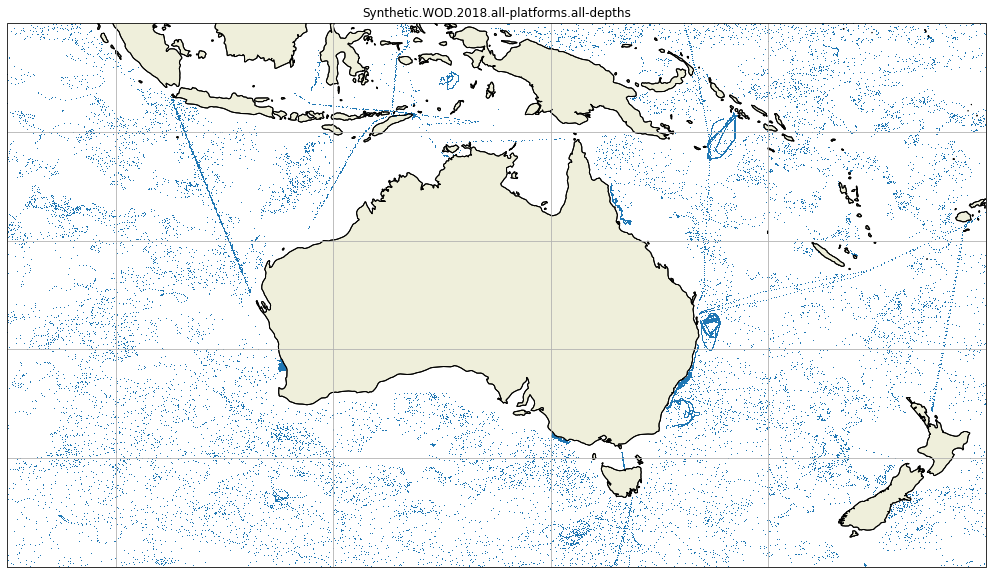

In [28]:
DF_plot(title='Synthetic.WOD.2018.all-platforms.all-depths',save_flag=True)

# How to bin upper 5m?

In [15]:
near_surface = DF['depth'] < 5.0

In [16]:
DF_surface = DF[near_surface]

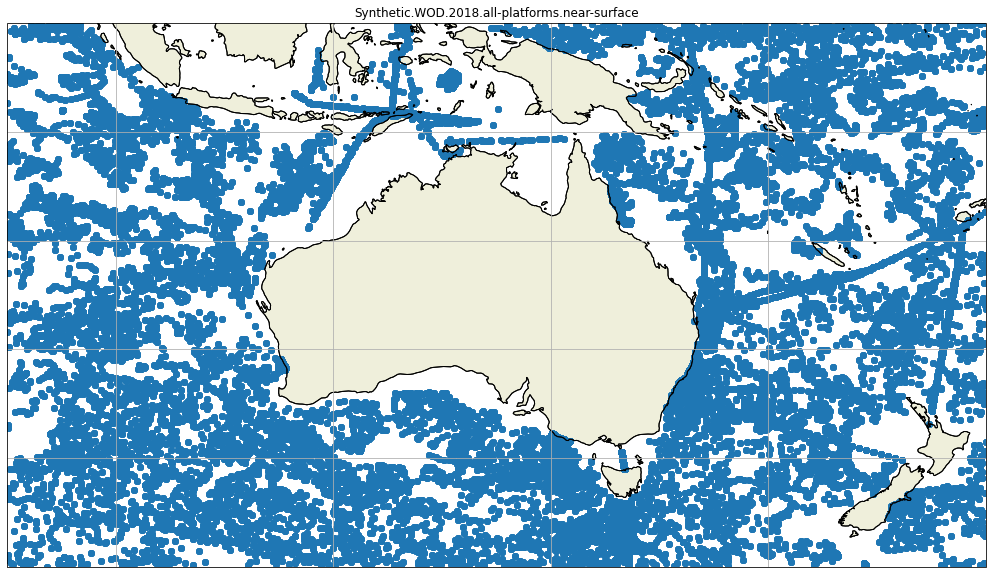

In [17]:
DF_plot(DF = DF_surface,title='Synthetic.WOD.2018.all-platforms.near-surface',save_flag=True)

In [18]:
DF_surface.temp.mean()

21.463143758944547

In [19]:
DF_surface.shape

(450776, 6)

In [20]:
DF_surface.depth.max()

4.331521511077881

# can we avg across cast?

In [21]:
DF_surface_groups = DF_surface.groupby(['longitude','latitude'])

In [27]:
DF_surface_groups.mean(numeric_only=True)

temp     depth
longitude  latitude                      
-269.99402 -28.40200  22.929148  2.373372
           -4.66700   28.986388  2.373372
-269.99100 -19.31500  24.283031  2.373372
-269.98500 -7.34100   29.688993  2.373372
-269.96500 -22.95900  21.647809  2.373372
...                         ...       ...
-180.01940 -29.39816   0.000000  2.373372
-180.01866 -34.96348   0.000000  2.373372
-180.00856 -26.26006   0.000000  2.373372
-180.00400 -21.73700   0.000000  2.373372
-180.00300 -38.54100   0.000000  2.373372

[70049 rows x 2 columns]

In [39]:
DF

,longitude,latitude,temp,depth,time,identifier
0,-258.4840,-4.240000,28.575226,0.541281,2018-01-01 02:37:00.000242688,ctd
1,-258.4840,-4.240000,28.578278,1.680735,2018-01-01 02:37:00.000242688,ctd
2,-258.4840,-4.240000,28.576155,2.939953,2018-01-01 02:37:00.000242688,ctd
3,-258.4840,-4.240000,28.570927,4.331522,2018-01-01 02:37:00.000242688,ctd
4,-258.4840,-4.240000,28.562220,5.869350,2018-01-01 02:37:00.000242688,ctd
...,...,...,...,...,...,...
6085471,-250.0061,-45.015556,3.251007,1333.076050,2018-01-03 07:12:59.999256576,osd
6085472,-250.0061,-45.015556,3.014744,1453.384399,2018-01-03 07:12:59.999256576,osd
6085473,-250.0061,-45.015556,2.835078,1581.153687,2018-01-03 07:12:59.999256576,osd
6085474,-250.0061,-45.015556,2.700748,1716.204712,2018-01-03 07:12:59.999256576,osd


## why do we have zero temperature values?

In [32]:
DF_surface.temp.min()

0.0

In [34]:
filter_zero = DF['temp'] == 0.0

In [35]:
DF_zero = DF[filter_zero]
DF_zero

,longitude,latitude,temp,depth,time,identifier
1080,-180.0475,-43.22883,0.0,0.541281,2018-01-08 17:09:59.995994112,ctd
1081,-180.0475,-43.22883,0.0,1.680735,2018-01-08 17:09:59.995994112,ctd
1082,-180.0475,-43.22883,0.0,2.939953,2018-01-08 17:09:59.995994112,ctd
1083,-180.0475,-43.22883,0.0,4.331522,2018-01-08 17:09:59.995994112,ctd
1084,-180.0475,-43.22883,0.0,5.869350,2018-01-08 17:09:59.995994112,ctd
...,...,...,...,...,...,...
1212133,-204.0400,-0.02000,0.0,1333.076050,2018-08-14,mrb
1212134,-204.0400,-0.02000,0.0,1453.384399,2018-08-14,mrb
1212135,-204.0400,-0.02000,0.0,1581.153687,2018-08-14,mrb
1212136,-204.0400,-0.02000,0.0,1716.204712,2018-08-14,mrb


In [36]:
DF

,longitude,latitude,temp,depth,time,identifier
0,-258.4840,-4.240000,28.575226,0.541281,2018-01-01 02:37:00.000242688,ctd
1,-258.4840,-4.240000,28.578278,1.680735,2018-01-01 02:37:00.000242688,ctd
2,-258.4840,-4.240000,28.576155,2.939953,2018-01-01 02:37:00.000242688,ctd
3,-258.4840,-4.240000,28.570927,4.331522,2018-01-01 02:37:00.000242688,ctd
4,-258.4840,-4.240000,28.562220,5.869350,2018-01-01 02:37:00.000242688,ctd
...,...,...,...,...,...,...
6085471,-250.0061,-45.015556,3.251007,1333.076050,2018-01-03 07:12:59.999256576,osd
6085472,-250.0061,-45.015556,3.014744,1453.384399,2018-01-03 07:12:59.999256576,osd
6085473,-250.0061,-45.015556,2.835078,1581.153687,2018-01-03 07:12:59.999256576,osd
6085474,-250.0061,-45.015556,2.700748,1716.204712,2018-01-03 07:12:59.999256576,osd


# 0.2% are zero? where are they?

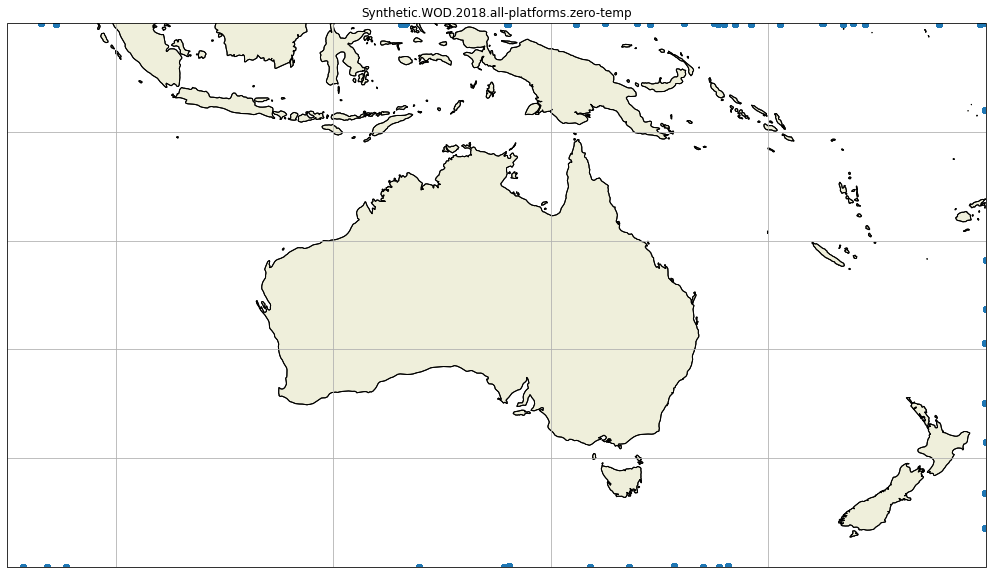

In [37]:
DF_plot(DF = DF_zero,title='Synthetic.WOD.2018.all-platforms.zero-temp',save_flag=True)

# We don't need to average as synthetic WOD are on standard model levels!

In [19]:
surface_filter = DF['depth']<0.55

In [20]:
surface_DF = DF[surface_filter]
surface_DF

,longitude,latitude,temp,depth,time,identifier
0,-258.48400,-4.240000,28.575226,0.541281,2018-01-01 02:37:00.000242688,ctd
54,-258.47400,-4.236000,28.578569,0.541281,2018-01-01 05:37:00.000886784,ctd
108,-258.00000,-4.000000,28.673746,0.541281,2018-01-01 09:08:59.999484928,ctd
162,-258.64000,-4.320000,28.567059,0.541281,2018-01-01 13:25:00.001144832,ctd
216,-258.72000,-4.360000,28.622971,0.541281,2018-01-01 13:51:00.001373184,ctd
...,...,...,...,...,...,...
6085206,-205.49046,-12.240970,29.354088,0.541281,2018-12-31 11:29:19.570312192,gld
6085260,-205.49585,-12.193150,29.376099,0.541281,2018-12-31 16:47:42.602806272,gld
6085314,-205.48760,-12.141720,29.393808,0.541281,2018-12-31 22:10:50.385475584,gld
6085368,-250.00027,-40.000280,13.765489,0.541281,2018-01-01 22:46:59.998169088,osd


# remove zero values

In [21]:
surface_DF = surface_DF[surface_DF.temp != 0.0]

In [22]:
surface_DF

,longitude,latitude,temp,depth,time,identifier
0,-258.48400,-4.240000,28.575226,0.541281,2018-01-01 02:37:00.000242688,ctd
54,-258.47400,-4.236000,28.578569,0.541281,2018-01-01 05:37:00.000886784,ctd
108,-258.00000,-4.000000,28.673746,0.541281,2018-01-01 09:08:59.999484928,ctd
162,-258.64000,-4.320000,28.567059,0.541281,2018-01-01 13:25:00.001144832,ctd
216,-258.72000,-4.360000,28.622971,0.541281,2018-01-01 13:51:00.001373184,ctd
...,...,...,...,...,...,...
6085206,-205.49046,-12.240970,29.354088,0.541281,2018-12-31 11:29:19.570312192,gld
6085260,-205.49585,-12.193150,29.376099,0.541281,2018-12-31 16:47:42.602806272,gld
6085314,-205.48760,-12.141720,29.393808,0.541281,2018-12-31 22:10:50.385475584,gld
6085368,-250.00027,-40.000280,13.765489,0.541281,2018-01-01 22:46:59.998169088,osd


# plot

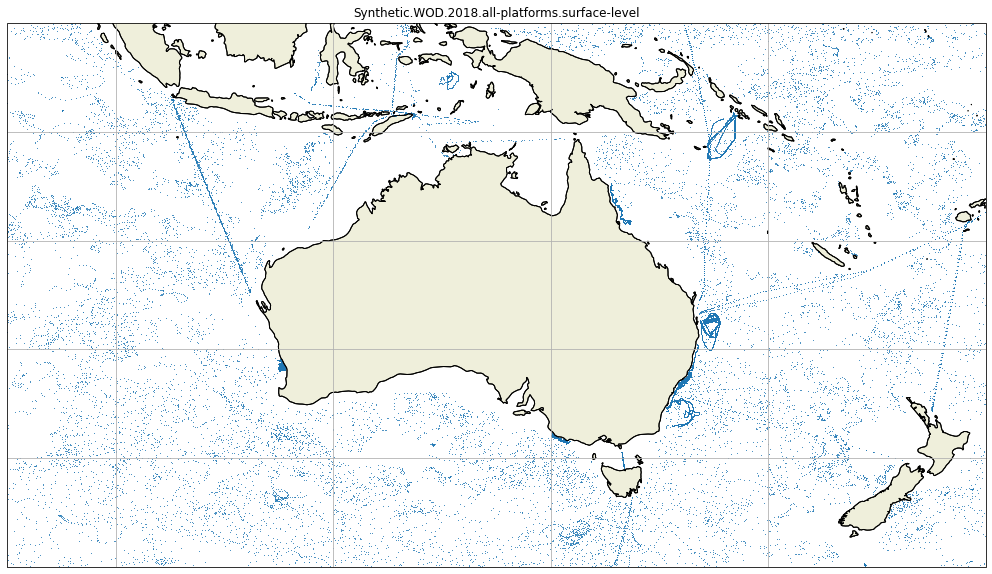

In [26]:
DF_plot(DF = surface_DF,title='Synthetic.WOD.2018.all-platforms.surface-level',save_flag=True)

# save surface DF to files

In [29]:
surface_DF.to_csv('/g/data/xv83/users/tm4888/PROJECTS/CARSv2/synthetic_wod_2018_all_surface.txt', sep ='\t')

In [30]:
surface_DS = surface_DF.to_xarray()
surface_DS

<xarray.Dataset>
Dimensions:     (index: 112389)
Coordinates:
  * index       (index) int64 0 54 108 162 ... 6085260 6085314 6085368 6085422
Data variables:
    longitude   (index) float64 -258.5 -258.5 -258.0 ... -205.5 -250.0 -250.0
    latitude    (index) float64 -4.24 -4.236 -4.0 -4.32 ... -12.14 -40.0 -45.02
    temp        (index) float64 28.58 28.58 28.67 28.57 ... 29.39 13.77 10.63
    depth       (index) float64 0.5413 0.5413 0.5413 ... 0.5413 0.5413 0.5413
    time        (index) object '2018-01-01 02:37:00.000242688' ... '2018-01-0...
    identifier  (index) object 'ctd' 'ctd' 'ctd' 'ctd' ... 'gld' 'osd' 'osd'

In [31]:
surface_DS.to_netcdf('/g/data/xv83/users/tm4888/PROJECTS/CARSv2/synthetic_wod_2018_all_surface.nc')

# explore CRoach input files

In [34]:
croach_example_path = '/g/data/xv83/users/tm4888/PROJECTS/CARSv2/CRoach/example_oxygen_atlas_scripts_and_input/input_for_julia/oxy/'

In [38]:
example_DS = xr.open_dataset(croach_example_path+'depth_lvl_0m.nc')
example_DS

<xarray.Dataset>
Dimensions:   (n: 846477, yn: 341, xn: 720, zn: 1)
Dimensions without coordinates: n, yn, xn, zn
Data variables: (12/18)
    distx     (n) float64 ...
    disty     (n) float64 ...
    distabs   (n) float64 ...
    lat       (n) float64 ...
    lon       (n) float64 ...
    oxy_raw   (n) float64 ...
    ...        ...
    uvlat     (yn, xn) float64 ...
    xg        (xn) float64 ...
    yg        (yn) float64 ...
    time      (n) float64 ...
    zlvl      (zn) float64 ...
    stdev     (zn) float64 ...

# what does input data look like for DIVAnd?

https://github.com/Thomas-Moore-Creative/Diva-Workshops/blob/master/notebooks/2-Preprocessing/07-reading-data.ipynb
Big files

The so-called big files are intermediate files using by DIVA and DIVAnd. The format is rather simple: a tab-separated file containing the following variables:

longitude,
latitude,
field value (e.g., temperature, salinity, chlorophyll concentration, ...),
depth,
time,
measurement identifier.

In [ ]:
example_nc_file = '/g/data/v14/tm4888/code/DIVAnd/Diva-Workshops/notebooks/data/dan_field_obs.nc'
example_txt_file = '/g/data/v14/tm4888/code/DIVAnd/Diva-Workshops/notebooks/data/data.txt'

In [ ]:
nc = xr.open_dataset(example_nc_file)
nc

In [ ]:
nc.to_dataframe()

In [ ]:
pd.read_csv(example_txt_file)

# Can we use the CC to load up this data?

In [ ]:
import cosima_cookbook as cc

In [ ]:
%%time
session = cc.database.create_session()
monthly_temp = cc.querying.getvar(expt='01deg_jra55v140_iaf', variable='temp', session=session, frequency='1 monthly', start_time='1987', end_time='2019')

In [ ]:
monthly_temp

# Note: below requires over 16GB of local RAM?

In [ ]:
%%time
session = cc.database.create_session()
daily_temp = cc.querying.getvar(expt='01deg_jra55v140_iaf', variable='temp', session=session, frequency='1 daily', start_time='1987', end_time='2019', return_dataset=True)

In [ ]:
daily_temp

## Load the model field (here from the 0.1 degree COSIMA model suite)

# switch

In [ ]:
model_temperature_dataset = daily_temp

# 34TB!

In [ ]:
model_temperature_dataset.nbytes/1e9

In [ ]:
grid010 = xarray.open_dataset('/g/data/ik11/grids/ocean_grid_01.nc')
grid010 = grid010.rename({'grid_x_C': 'xu_ocean', 'grid_y_C': 'yu_ocean',
                          'grid_x_T': 'xt_ocean', 'grid_y_T': 'yt_ocean'})

In [ ]:
grid010

In [ ]:
model_temperature_dataset = model_temperature_dataset.assign_coords({'geolat_t': grid010.geolat_t, 'geolon_t': grid010.geolon_t})
model_temperature_dataset = model_temperature_dataset.rename({'xt_ocean': 'x', 'yt_ocean': 'y',
                                                              'geolon_t': 'longitude', 'geolat_t': 'latitude'})


In [ ]:
model_temperature_dataset['temp'][0,0,:,:].plot()

In [ ]:
#lon_name = 'xt_ocean'
#model_temperature_dataset = model_temperature_dataset.assign_coords({lon_name: (model_temperature_dataset[lon_name] + 360)  % 360})
#model_temperature_dataset.sortby(model_temperature_dataset)
#ds_out = ds_out.assign_coords({'lon': ds_out.lon - 100.})
#model_temperature_dataset = model_temperature_dataset.assign_coords({lon_name: (model_temperature_dataset[lon_name] + (90+280)) % 360})
#model_temperature_dataset = model_temperature_dataset.assign_coords({lon_name: (model_temperature_dataset[lon_name] - 100)})

# I believe for xESMF to not bog down *ALL* space must be in one chunk?

In [ ]:
%%time
model_temperature_dataset = model_temperature_dataset.chunk({'time':1,'st_ocean':-1,'x':-1,'y':-1})

In [ ]:
model_temperature_dataset

# Load the World Ocean Database data


In [ ]:
WOD_base_file_path ='/g/data/ul08/WOD_2018'

year = 2018
WOD_file_name_stem = 'wod_'


obs_platform_type = ['ctd','xbt','pfl','mrb','gld','drb','osd']

WOD_object = dict(zip(obs_platform_type, [None]*len(obs_platform_type)))


for i_platform_type in obs_platform_type:
    
    WOD_object[i_platform_type] = xarray.open_dataset(os.path.join(WOD_base_file_path,str(2018),
                                                                   WOD_file_name_stem + i_platform_type + '_' + str(year) + '.nc') )
    


In [ ]:
platform_type = 'xbt'

WOD_lat = WOD_object[platform_type]['lat'].copy().values
WOD_lon = WOD_object[platform_type]['lon'].copy().values


In [ ]:
WOD_lon[WOD_lon>90] = WOD_lon[WOD_lon>90] - (270+90) 

In [ ]:
plt.scatter(WOD_object[platform_type]['lon'],WOD_object[platform_type]['lat'],s=25)
plt.scatter(WOD_lon,WOD_lat,s=10)


In [ ]:
ds_WOD_stations = xarray.Dataset()
ds_WOD_stations['longitude'] = xarray.DataArray(data=WOD_lon, dims=('casts'))
ds_WOD_stations['latitude'] = xarray.DataArray(data=WOD_lat, dims=('casts'))
ds_WOD_stations['time'] = xarray.DataArray(data=WOD_object[platform_type]['time'].values, dims=('casts'))

ds_WOD_stations = ds_WOD_stations.where(np.logical_and(ds_WOD_stations['longitude']>-280,
                                                       ds_WOD_stations['longitude']<-180),drop=True)
ds_WOD_stations = ds_WOD_stations.where(np.logical_and(ds_WOD_stations['latitude']>-50,
                                                       ds_WOD_stations['latitude']<0),drop=True)


In [ ]:
plt.contourf(model_temperature_dataset['temp']['xt_ocean'],model_temperature_dataset['temp']['yt_ocean'],
             model_temperature_dataset['temp'][0,0,:,:],25)
plt.scatter(ds_WOD_stations['longitude'],ds_WOD_stations['latitude'])

#plt.scatter(WOD_lon,WOD_lat,s=10)


In [ ]:
WOD_object['pfl']['z'].max()

In [ ]:
#model_temperature = model_temperature.drop({'x', 'y'}).cf.to_dataset()


#model_temperature = model_temperature.sel(time=ds_WOD_stations['time'].values,method='nearest')

#model_temperature = model_temperature.chunk({'time':5,'st_ocean':-1,'y':-1,'x':-1})

In [ ]:
max_depth = 800

n_levels = model_temperature_dataset['st_ocean'].sel(st_ocean=slice(0,max_depth)).size
n_casts  = ds_WOD_stations['casts'].size
KELVIN_TO_CELSIUS = -273.15



WOD_temperature_synthetic = xarray.DataArray(np.zeros([n_casts,n_levels],dtype=np.float32),
                                             dims=['casts','depth'],
                                             coords={'casts':ds_WOD_stations['casts'],
                                                     'depth':model_temperature_dataset['st_ocean'][0:n_levels].values}).to_dataset(name='temp')
WOD_temperature_synthetic['latitude'] = ds_WOD_stations['latitude']


WOD_temperature_synthetic['longitude'] = ds_WOD_stations['longitude']
WOD_temperature_synthetic['time'] = ds_WOD_stations['time']



#model_temperature_level = model_temperature_dataset['temp'].sel(st_ocean=slice(0,max_depth)) 


for i_level in range(25,n_levels):
    model_temperature_level = model_temperature_dataset['temp'].isel(st_ocean=i_level).load() 
    model_temperature_level = model_temperature_level + KELVIN_TO_CELSIUS
    
    
    regridder = xesmf.Regridder(model_temperature_level, ds_WOD_stations, 'bilinear', locstream_out=True) #,reuse_weights=True)
    
    WOD_temperature_synthetic_level = regridder(model_temperature_level)
    WOD_temperature_synthetic_level.to_netcdf(os.path.join('/g/data4/ul08/CARS_v2/Synthetic_WOD/staging', 
                                                           'WOD_synthetic_' + platform_type + '_2018_' + 'level_' + str(i_level) +  '.nc') ) 
    
    
    WOD_temperature_synthetic['temp'][:,i_level] = WOD_temperature_synthetic_level.sel(time=ds_WOD_stations['time'],method='nearest')
    
    


In [ ]:
WOD_temperature_synthetic_level

In [ ]:


for i_level in range(0,n_levels):
    #Get the slice for the current synthetic layer
    WOD_temperature_synthetic_level = xarray.open_dataset(os.path.join('/g/data4/ul08/CARS_v2/Synthetic_WOD/staging', 
                                                           'WOD_synthetic_' + platform_type + '_2018_' + 'level_' + str(i_level) +  '.nc') )
    WOD_temperature_synthetic['temp'][:,i_level] = WOD_temperature_synthetic_level['__xarray_dataarray_variable__'].sel(time=ds_WOD_stations['time'],method='nearest')
    WOD_temperature_synthetic_level.close()

In [ ]:
WOD_temperature_synthetic['temp'][20,:].plot()

In [ ]:
model_temperature_level

In [ ]:
model_temperature_level

In [ ]:
plt.scatter(WOD_temperature_synthetic['longitude'],WOD_temperature_synthetic['latitude'],c=WOD_temperature_synthetic['temp'][:,0],vmin=10,vmax=35)
plt.colorbar()

In [ ]:
model_temperature_level[0,:,:].plot(vmin=10,vmax=35)

In [ ]:
model_temperature_level

In [ ]:
regridder.to_netcdf('/g/data4/ul08/CARS_v2/regrid_weights_xbt.nc')

In [ ]:
test_xbt.compute()

In [ ]:
unique_days = np.unique(ds_WOD_stations['time.dayofyear'])

In [ ]:
for i_day in unique_days:
    
    model_temperature_dayofyear = model_temperature.sel(time=model_temperature['time'].dt.dayofyear.isin([i_day]))
    WOD_time_index = ds_WOD_stations['time'].dt.dayofyear.isin([i_day])
    ds_WOD_stations_dayofyear = ds_WOD_stations.where(WOD_time_index,drop=True)
    

    dsa
    

In [ ]:
WOD_time_index

In [ ]:
ds_WOD_stations_dayofyear

In [ ]:
ds_WOD_stations

In [ ]:
regridder = xesmf.Regridder(model_temperature, ds_WOD_stations, 'bilinear', locstream_out=True)


In [ ]:
regridder

In [ ]:
WOD_temperature_synthetic = regridder(model_temperature).compute()



In [ ]:
WOD_temperature_synthetic

In [ ]:
model_temperature

In [ ]:
WOD_temperature_synthetic['temp'][0,:,0].plot()

In [1]:
client.shutdown()

NameError: name 'client' is not defined